## Imports 

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier
from pprint import pprint
from sklearn.metrics import ConfusionMatrixDisplay


if not "root" in locals():
    current_path = Path(os.getcwd())
    root = current_path.parent.absolute()
os.chdir(root)


In [4]:
import pandas as pd

def add_AR_cols(df: pd.DataFrame, lags: int, return_cols=False)-> pd.DataFrame:
    """
    added columns defined by VIX_lagged_i = VIX - VIX_-i
    :param df: DataFrame containing all variables
    :param lags: number of passed unit time added to the DataFrame
    :return: the DataFrame with the lagged columns
    """
    VIX = 'PX_OPEN_VIX_volatility'
    cols=[]

    for i in range(1,lags):
        df['VIX_LAG_' + str(i)] = df[VIX] - df[VIX].shift(i)
        cols.append('VIX_LAG_' + str(i))


    if return_cols: return df.dropna(), cols
    else: return df.dropna()

In [7]:
import os
from pathlib import Path

import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

from data_treatment.box_creator import create_binary_box

if not "root" in locals():
    current_path = Path(os.getcwd())
    root = current_path.parent.absolute()
os.chdir(root)

PATH = "../"

cols_selected_by_lasso = ['PX_OPEN_VIX_volatility', 'VOLUME_TOTAL_CALL_VIX_volatility',
       '3MTH_IMPVOL_110.0%MNY_DF_VIX_volatility',
       'PUT_CALL_VOLUME_RATIO_CUR_DAY_SPX_volatility',
       'VOLUME_TOTAL_PUT_SPX_volatility', 'QMJ USA_QMJ Factors',
       'BAB Global_BAB Factors', 'Bullish_SENTIMENT',
       'Bullish 8-week Mov Avg_SENTIMENT',
       'Mkt-RF_F-F_Research_Data_5_Factors_2x3_daily',
       'SMB_F-F_Research_Data_5_Factors_2x3_daily', 'VIX_LAG_1', 'VIX_LAG_3',
       'VIX_LAG_4', 'VIX_LAG_5']

def easy_data_import():
    df = pd.read_csv('database.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df = create_binary_box(df, relative_threshold = 0.05, box_length=5).set_index(['Date']).dropna(axis = 0)
    df = add_AR_cols(df,7)

    scaler = StandardScaler()
    X = scaler.fit_transform(df[cols_selected_by_lasso])
    y = df['Box']

    
    
    ts_cv = TimeSeriesSplit()
    return X, y, ts_cv



,PX_OPEN_VIX_volatility,PX_HIGH_VIX_volatility,PX_LOW_VIX_volatility,PX_LAST_VIX_volatility,VOLUME_TOTAL_CALL_VIX_volatility,PUT_CALL_VOLUME_RATIO_CUR_DAY_VIX_volatility,VOLUME_TOTAL_PUT_VIX_volatility,TOT_OPT_VOLUME_CUR_DAY_VIX_volatility,OPEN_INT_TOTAL_CALL_VIX_volatility,OPEN_INT_TOTAL_PUT_VIX_volatility,...,CMA_F-F_Research_Data_5_Factors_2x3_daily,RF_F-F_Research_Data_5_Factors_2x3_daily,Mom _F-F_Momentum_Factor_daily,Box,VIX_LAG_1,VIX_LAG_2,VIX_LAG_3,VIX_LAG_4,VIX_LAG_5,VIX_LAG_6
Date,,,,,,,,,,,,,,,,,,,,,
2006-07-06,14.04,14.04,13.25,13.65,3862.0,0.0844,326.0,4188.0,678935.0,151125.0,...,0.24,0.020,-0.10,0,0.12,0.75,1.14,-1.24,-1.98,-1.54
2014-07-28,12.93,13.64,12.54,12.56,157091.0,0.2131,33477.0,190568.0,6142958.0,1610454.0,...,-0.04,0.000,-0.21,1,0.90,1.50,1.39,0.96,0.08,-0.41
2007-01-29,11.50,11.60,10.92,11.45,13581.0,0.4268,5796.0,19377.0,562977.0,148192.0,...,0.11,0.022,0.06,0,0.55,1.51,1.09,0.73,0.73,0.70
2009-09-15,23.90,24.27,23.07,23.42,129257.0,0.3291,42542.0,171799.0,1993141.0,872618.0,...,-0.01,0.000,-1.09,1,-1.49,0.41,-0.50,-1.76,-1.36,-3.08
2016-08-31,13.14,14.34,12.97,13.42,173308.0,0.5954,103187.0,276495.0,4799227.0,2060459.0,...,-0.35,0.001,0.23,0,0.20,-0.95,-0.40,-0.48,0.44,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-18,14.61,15.80,13.80,13.95,773256.0,0.5796,448161.0,1221417.0,4799868.0,1432512.0,...,0.04,0.009,1.03,1,-0.31,-0.28,0.45,-0.08,-0.72,-0.92
2017-01-30,11.10,12.90,11.10,11.88,568028.0,0.3134,178047.0,746075.0,5455926.0,1980735.0,...,-0.16,0.002,-0.70,1,0.53,0.49,0.31,-0.72,-1.20,-1.48
2016-04-21,13.20,14.14,13.16,13.95,229425.0,0.6711,153977.0,383402.0,5320506.0,1508160.0,...,-0.29,0.000,-0.94,1,-0.19,0.02,-1.67,-0.57,-0.70,-1.29


### Getting our data 

In [29]:

X, y , ts_cv = easy_data_import()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# 1) Random Forest 

### All the possible parameters 

In [30]:
rf = RandomForestClassifier(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Using a randomized grid search 

In [37]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [3,10,30]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,3,4,5]

# Method of selecting samples for training each tree
bootstrap = [False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [False],
 'max_depth': [2, 3, 4, 5],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [3, 10, 30]}


### Training 

In [38]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator = rf, param_grid = random_grid , cv = ts_cv)
# Fit the random search model
rf_random.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False], 'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [3, 10, 30]})

### Our final model 

In [39]:
final_model = rf_random.best_estimator_

In [40]:
print(final_model)

RandomForestClassifier(bootstrap=False, max_depth=4, max_features='sqrt',
                       n_estimators=10)


In [41]:
y_pred= final_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.78      0.68       244
           1       0.68      0.48      0.56       239

    accuracy                           0.63       483
   macro avg       0.64      0.63      0.62       483
weighted avg       0.64      0.63      0.62       483



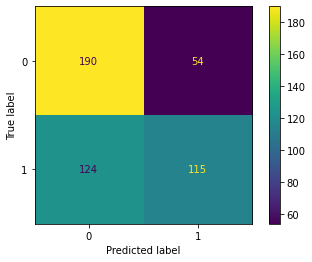

In [42]:
ConfusionMatrixDisplay.from_estimator(estimator=final_model, X=X_test, y=y_test)

# 2) Decision Tree

In [26]:
tree_clf= DecisionTreeClassifier(max_depth= 4)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

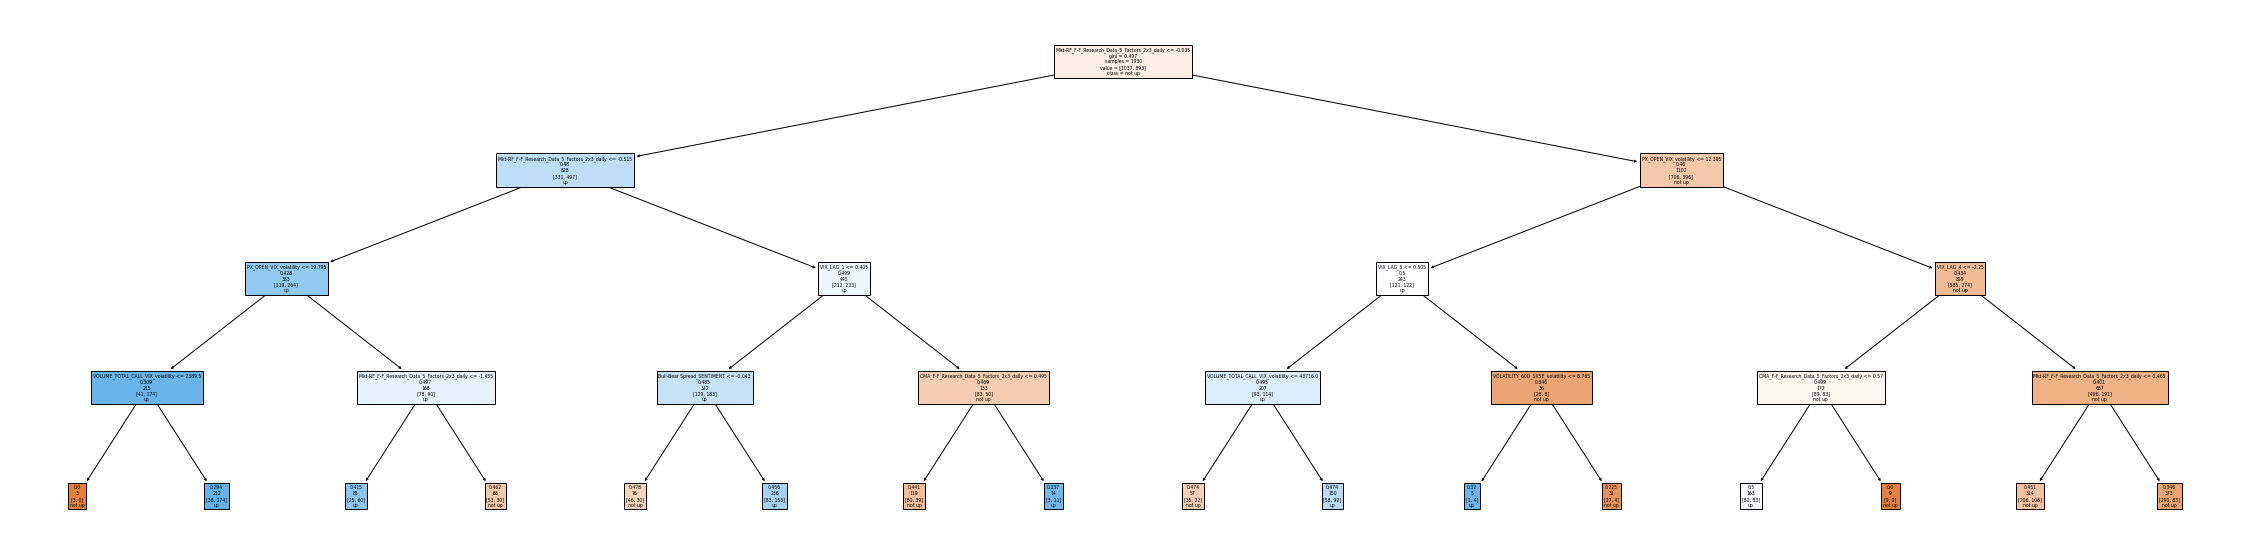

In [27]:
from sklearn import tree


fig = plt.figure(figsize=(40,10))
_ = tree.plot_tree(tree_clf, 
                   label='root',
                   feature_names= our_features,  
                   class_names= ['not up', 'up'],
                   filled=True)

## 3) Boosting 

### AdaBoost

In [43]:
from sklearn.ensemble import AdaBoostClassifier 



ada_clf = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=3),
            n_estimators= 200,
            algorithm= "SAMME.R",
            learning_rate=0.5)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [44]:
y_pred= ada_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.72      0.66       244
           1       0.65      0.54      0.59       239

    accuracy                           0.63       483
   macro avg       0.63      0.63      0.63       483
weighted avg       0.63      0.63      0.63       483



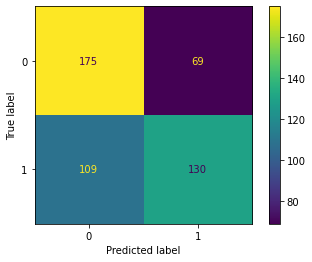

In [46]:
ConfusionMatrixDisplay.from_estimator(estimator=ada_clf, X=X_test, y=y_test)